In [2]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Load the CSV file into a pandas DataFrame
antilockdown = pd.read_csv('../Reddit_Sentiments/antilockdown_sentiments.csv')
antilockdown = antilockdown[antilockdown['sentiment_polarity_summary']=='negative']
antilockdown.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 1 to 1520
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                445 non-null    int64  
 1   Unnamed: 0                  445 non-null    int64  
 2   id                          445 non-null    object 
 3   author                      445 non-null    object 
 4   title                       445 non-null    object 
 5   score                       445 non-null    int64  
 6   comms_num                   445 non-null    int64  
 7   created                     445 non-null    float64
 8   timestamp                   445 non-null    object 
 9   commenter                   399 non-null    object 
 10  comment                     445 non-null    object 
 11  top_lvl                     445 non-null    int64  
 12  sentiment_polarity          445 non-null    float64
 13  cluster                     445 no

In [4]:
#get unique id
ids = list(antilockdown['id'].unique())

<h1>Anti-LOCKDOWN</h1>

In [5]:
antilockdown['title'].loc[antilockdown['id']=='g4kdfs'].iloc[0]

'Counter-Protesters in Scrubs Block Some Anti-Lockdown Campaigners in Denver'

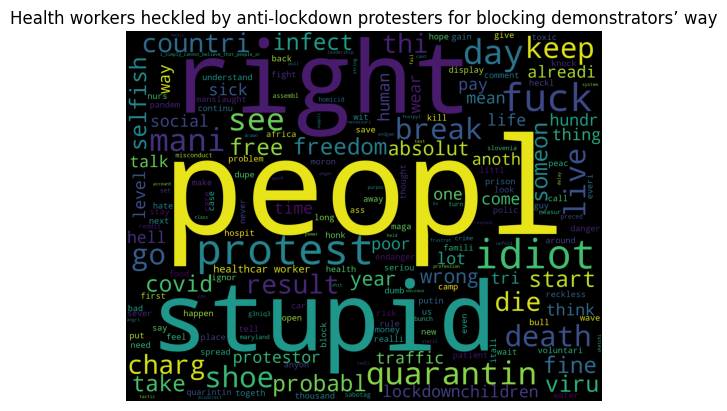

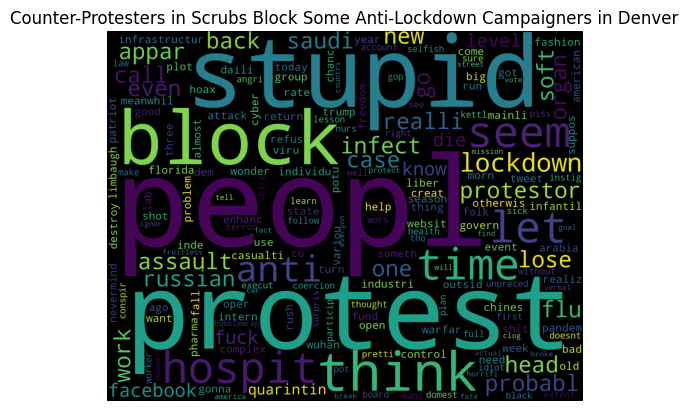

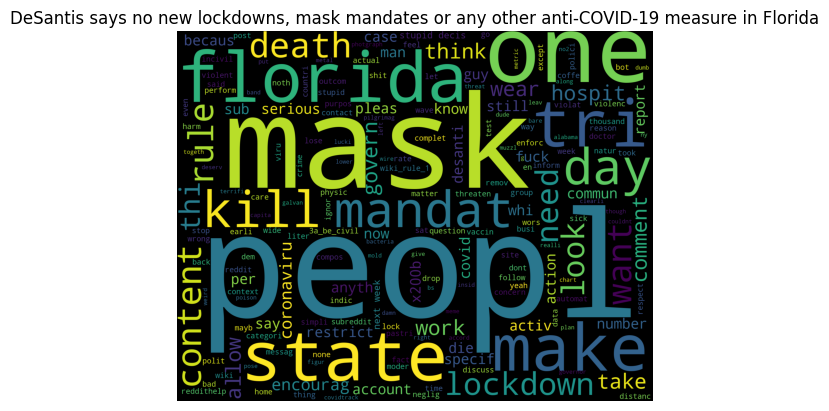

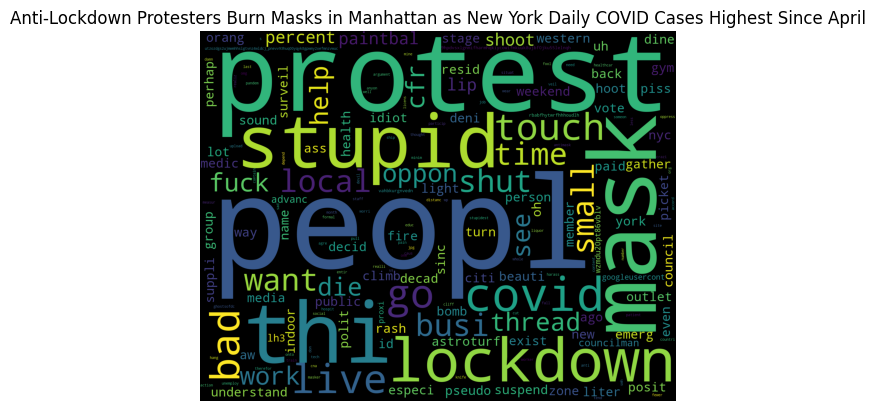

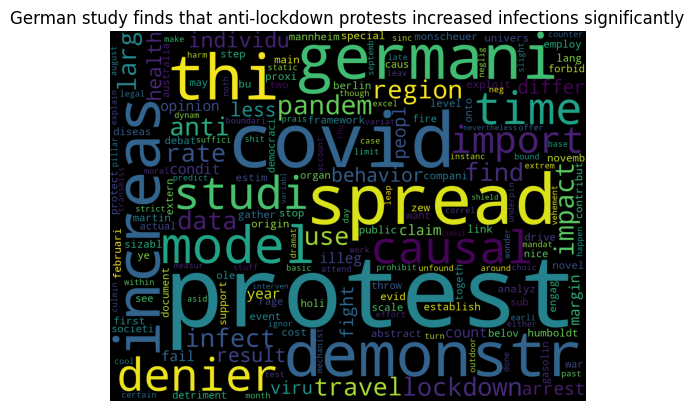

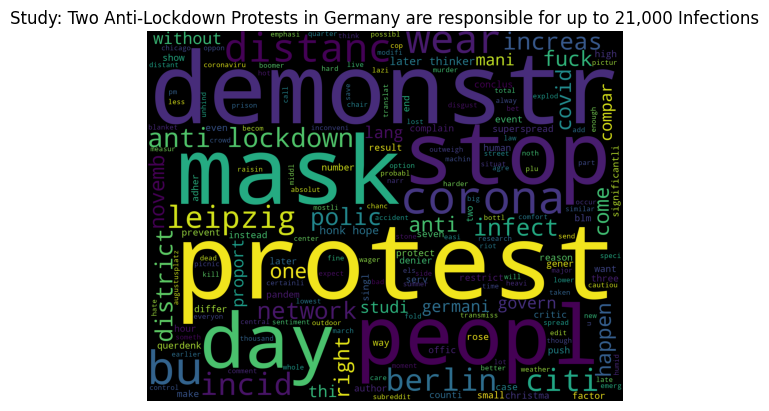

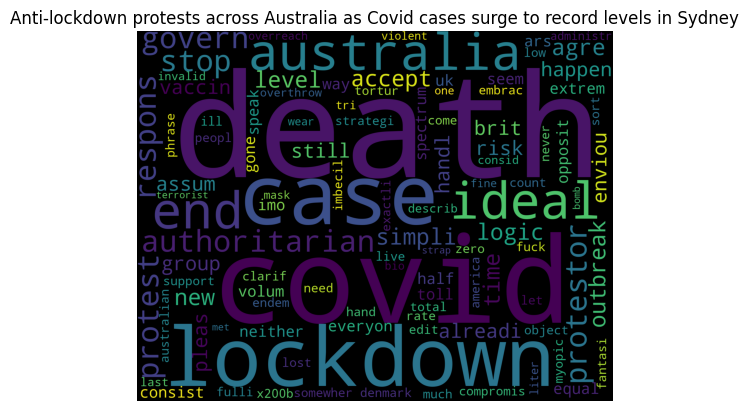

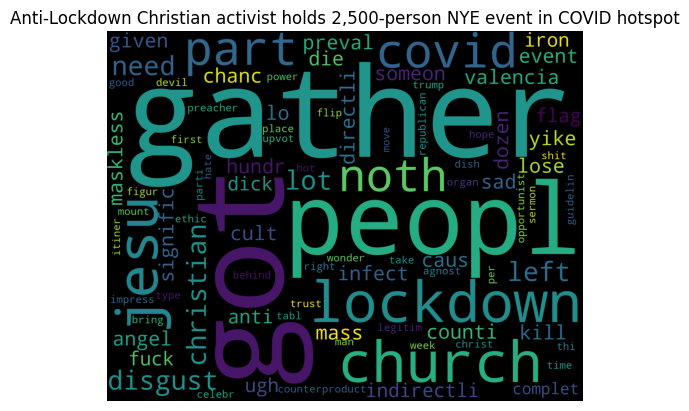

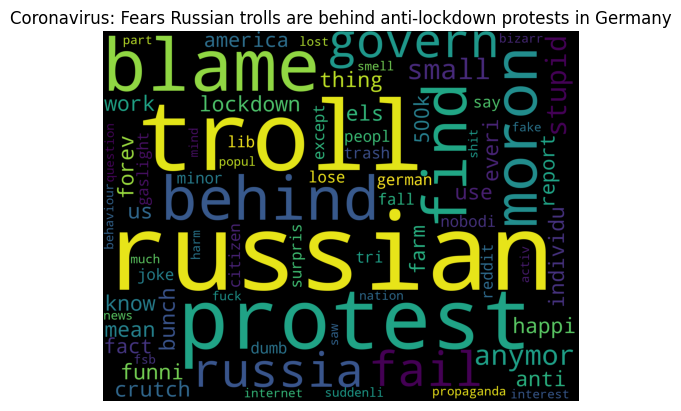

In [7]:
for id in ids:
    comments_list = list(antilockdown['comment'][antilockdown.id==id])
    comments = " ".join([str(x) for x in comments_list])
    word_cloud = WordCloud(background_color='black',
                       width=1800,
                       height=1400).generate(comments)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(str(antilockdown['title'].loc[antilockdown['id']==id].iloc[0]))
    # print(str(antilockdown['title'].loc[antilockdown['id']==id].iloc[0]))
    plt.show()
    